 ---
title: "Code file"
description: "Testing Quarto"
author: "Saman Givian"
date: "03/06/2023"
date-modified: "03/06/2023"
---

## Introduction


### Datasets 
This project explores two different datasets. The main dataset is the social scientists who testified before congress from 1946-2016(with a slight update from 2016), the hearings they testified at, and the characteristics of 
those hearings, such as the congressional committees that convened them. 
This dataset was collected with the support NSF grant by Charles Seguin, Thomas V. Maher, and Yongjun Zhang 
and published on July 19, 2022.

For the other dataset. I couldn't find a dataset that has a breakdown of each congress by party and year.
But I found a table containing this information on the History, Art & Archives of the US House of Representatives.
So I scrapped the website and turned it into a dataset with the help of BeautifulSoup API.



### Links to datasets:
* [Social scientists congressional testimony](https://osf.io/e3h98/files/osfstorage).
* [Party Divisions of the House of Representatives, 1789 to Present](https://history.house.gov/Institution/Party-Divisions/Party-Divisions/).



### Motivation
Since the beginning of Covid-19, science and scientists have faced a lot of distrust and attacks from the public and even congress. I was curious to see if congress has historically relied on experience and guidance of experts for help or not. Specifically, during times of crises like the financial crises of 2008 or the stagflation of the 1980s, 2001 terrorist wether congress would ask for help from social scientists and questions when necessary and rely on their judgment and guidance. I also wanted to see whether our government relies more on the help of experts compared to the past(have we become more science and data-driven).
    
### Questions
1. What type of social scientists does congress mostly invite for testiomny?
2. Has the number of social scientists appearning before congress increased?
3. Are there any patterns between crises and number of scientists appearning between congress?
4. Does congress being dominated by republicans or democrates effect the number of social scientists appearning before congress?
5. What type of social scientists appear the most?

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [3]:
#Getting the first Dataset - social science congressional testimony
df_testimony = pd.read_csv('https://osf.io/download/asdp8/')
df_testimony.to_csv('SocialScientistsTestiomonyDataset.csv')


In [4]:
df_testimony.head()

,Unnamed: 0,hearing_id,year,date_begin,date_end,witness_name,witness_affiliation,discipline1,discipline2,discipline3,...,thinktank1,thinktank2,full_committee1,sub_committee1,full_committee2,sub_committee2,title_description,filter,HID,univ_aff
0,1,HRG-1946-SAP-0010,1946,"May 8, 1946","Jun. 3, 1946",howard grieves,"chief economist, census bur",Economist,NaN,NaN,...,NaN,NaN,committee on appropriations. senate,NaN,NaN,NaN,"departments of state, justice, commerce, and t...",1,20171,0
1,2,HRG-1947-SAP-0013,1947,"May 26, 1947","Jun. 16, 1947",philip hauser,"dep dir, bur of census",Sociologist,NaN,NaN,...,NaN,NaN,committee on appropriations. senate,NaN,NaN,NaN,"departments of state, justice, commerce, and t...",1,20655,0
2,3,HRG-1947-MMF-0018,1947,"Jun. 27, 1947","Jul. 16, 1947",j. ely,"chief, foreign trade div, bur of census, comme...",Economist,NaN,NaN,...,NaN,NaN,committee on merchant marine and fisheries. house,NaN,NaN,NaN,use of american-owned tankers transporting gas...,1,21081,0
3,4,HRG-1948-EXD-0008,1948,"Mar. 24, 1948","Apr. 15, 1948",j. ely,"chief, foreign trade div, census bur, commerce...",Economist,NaN,NaN,...,NaN,NaN,committee on expenditures in executive departm...,subcommittee on surplus property,NaN,NaN,"investigation, disposition of surplus property...",1,21584,0
4,5,HRG-1949-SAP-0018,1949,"Aug. 31, 1949","Sep. 15, 1949",philip hauser,"act dir, bur of census",Sociologist,NaN,NaN,...,NaN,NaN,committee on appropriations. senate,NaN,NaN,NaN,supplemental appropriation bill for 1950,1,22017,0


In [5]:
response = requests.get('https://history.house.gov/Institution/Party-Divisions/Party-Divisions/')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")

In [6]:
#Table Header
columns_headers = []

table = document.find('table')
table_header = table.find("thead")

for header in table_header.find_all("th"):
    columns_headers.append(header.text.strip())

print(columns_headers)

['Congress (Years)', '# of House Seats', 'Pro-Administration', 'Anti-Administration', 'Other', 'Del./Res.']


In [7]:
#grabbed the headers from website in the table
columns_headers[2] = "Democrats"
columns_headers[3] = "Republicans"
columns_headers.append("Year")
columns_headers.append("Congress")
columns_headers.append("Count")

In [8]:


data = []

#Table body
table_body = table.find("tbody")

add_row_permission = False
congress_counter = 0

for row in table_body.find_all("tr"):
  table_row = []
  first_cell = True
  congress = ""
  year = ""
  for cell in row.find_all("td"):
    if(first_cell):
      first_cell_list = cell.text.strip().split(" ")
      congress = first_cell_list[0]
      year = first_cell_list[1]
      if("1945" in year):
        add_row_permission = True
        
      first_cell = False
      
    if(add_row_permission):
     
      table_row.append(cell.text.strip())
  
  if(add_row_permission):
    congress_counter += 1
    table_row.append(year)
    table_row.append(congress)
    table_row.append(congress_counter)

    data.append(table_row)

df_congress_breakdown = pd.DataFrame(data, columns=columns_headers)

In [9]:
df_congress_breakdown.head()

,Congress (Years),# of House Seats,Democrats,Republicans,Other,Del./Res.,Year,Congress,Count
0,78th (1943–1945),435,222,209,"Progressives (2),Farmer-Labor (1),American Lab...",2/2,(1943–1945),78th,1.0
1,79th (1945–1947),435,244,189,"Progressives (1),American Labor (1)",2/2,(1945–1947),79th,2.0
2,80th (1947–1949),435,188,246,American Labor (1),2/1,(1947–1949),80th,3.0
3,81st (1949–1951),435,263,171,American Labor (1),2/1,(1949–1951),81st,4.0
4,82nd (1951–1953),435,235,199,Independent (1),2/1,(1951–1953),82nd,5.0


In [10]:
df_congress_breakdown.columns

Index(['Congress (Years)', '# of House Seats', 'Democrats', 'Republicans',
       'Other', 'Del./Res.', 'Year', 'Congress', 'Count'],
      dtype='object')

In [11]:
df_congress_breakdown.dropna(how='any', inplace=True)

In [12]:
display(df_congress_breakdown)

,Congress (Years),# of House Seats,Democrats,Republicans,Other,Del./Res.,Year,Congress,Count
0,78th (1943–1945),435,222,209,"Progressives (2),Farmer-Labor (1),American Lab...",2/2,(1943–1945),78th,1.0
1,79th (1945–1947),435,244,189,"Progressives (1),American Labor (1)",2/2,(1945–1947),79th,2.0
2,80th (1947–1949),435,188,246,American Labor (1),2/1,(1947–1949),80th,3.0
3,81st (1949–1951),435,263,171,American Labor (1),2/1,(1949–1951),81st,4.0
4,82nd (1951–1953),435,235,199,Independent (1),2/1,(1951–1953),82nd,5.0
5,83rd (1953–1955),435,213,221,Independent (1),2/1,(1953–1955),83rd,6.0
6,84th (1955–1957),435,232,203,0,2/1,(1955–1957),84th,7.0
8,85th (1957–1959),435,232,203,0,2/1,(1957–1959),85th,9.0
9,86th (1959–1961),4363,282,153,Independent Democrat (1),1/1,(1959–1961),86th,10.0
10,87th (1961–1963),437,264,173,0,0/1,(1961–1963),87th,11.0


In [13]:
df_congress_breakdown.to_csv('CongressDataset.csv')

In [14]:
print(df_congress_breakdown.dtypes)

Congress (Years)     object
# of House Seats     object
Democrats            object
Republicans          object
Other                object
Del./Res.            object
Year                 object
Congress             object
Count               float64
dtype: object


In [15]:
df_congress_breakdown['Democrats'] = df_congress_breakdown['Democrats'].astype(int)
df_congress_breakdown['Republicans'] = df_congress_breakdown['Republicans'].astype(int)

### Explatory part 
a little bit of it is at the end because I used the combined data set for it.

['Anthropologist', 'Economist', 'Political Scientist', 'Psychologist', 'Sociologist']
[305, 10821, 2482, 970, 904]


<AxesSubplot: >

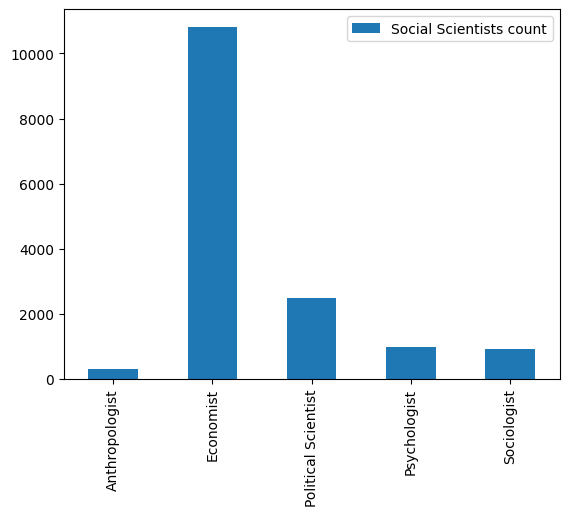

In [16]:
#Visualization 1
df_testimony_discipline1 = df_testimony.groupby('discipline1')['discipline1'].count()
scientists_type = list(df_testimony_discipline1.keys())
scientists_value = list(df_testimony_discipline1)
print(scientists_type)
print(scientists_value)
plotdata = pd.DataFrame(
    {"Social Scientists count": scientists_value}, 
    index=scientists_type)

plotdata.plot(kind="bar")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


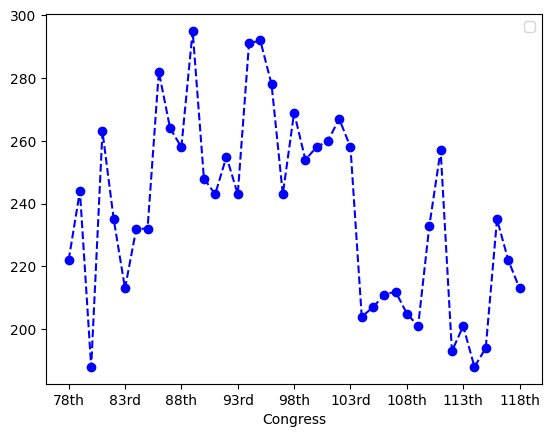

In [17]:
#Visualization 2

df_congress_breakdown.plot(x = "Congress",y='Democrats', linestyle='--', marker='o', color='b', label='')
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


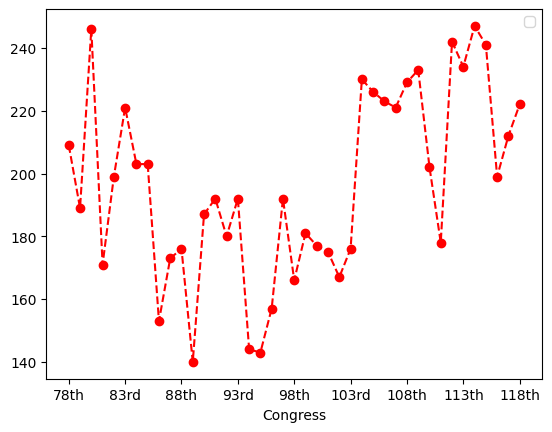

In [18]:
#Visualization 3

df_congress_breakdown.plot(x = "Congress",y='Republicans', linestyle='--', marker='o', color='r', label='')
plt.legend()

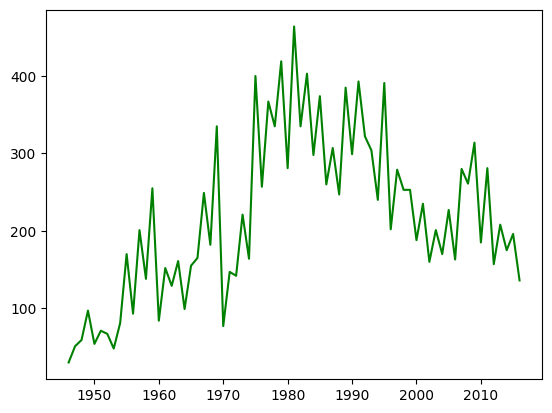

In [19]:
#Visualization 4 - Scientists by year
df_testimony_appearence_count_year = df_testimony.groupby('year')['year'].count()

#print(df_testimony_appearence_count_year)
x = list(df_testimony_appearence_count_year.keys())
y = list(df_testimony_appearence_count_year)
plt.plot(x,y,'g')

In [ ]:
#Visualization 5 - Scientists by year
appearence_by_scientists = df_testimony.groupby('witness_name')['witness_name'].count().sort_values(ascending=False)
print(appearence_by_scientists)
appearence_by_scientists.describe()

plt.hist(appearence_by_scientists,bins=50, color='green')

In [ ]:
### Analysis


In [ ]:
# Merging the the two datasets 
year1 = []
year2 = [] 
for ind in df_congress_breakdown.index:
    #print(df_congress_breakdown['Year'][ind])
    
    if("2021" in df_congress_breakdown['Year'][ind] and "2019" in df_congress_breakdown['Year'][ind]):
        years = df_congress_breakdown['Year'][ind].split("-")
    else:
        years = df_congress_breakdown['Year'][ind].split("–")
    year1.append(int(years[0][1:5]))
    year2.append(int(years[1][0:4])-1)
    
    

df_congress_breakdown['Year_1'] = year1
df_congress_breakdown['Year_2'] = year2

df_testimony['Year_1'] = df_testimony["year"]
df_testimony['Year_2'] = df_testimony["year"]

new_df_1 = pd.merge(df_congress_breakdown, df_testimony,  how='left', left_on=['Year_1'], right_on = ['Year_1'])
new_df_2 = pd.merge(df_congress_breakdown, df_testimony,  how='left', left_on=['Year_2'], right_on = ['Year_2'])

frames = [new_df_1, new_df_2]

df_merged = pd.concat(frames)
display(df_merged)
df_merged.to_csv('MergedDataset.csv')

In [ ]:

#Visualization 1 - number of scient appearenace by congress - year

sciencets_by_congress = df_merged.groupby('Congress')['Congress'].count()

print(sciencets_by_congress)

x_unsorted = list(sciencets_by_congress.keys())

y_unsorted = list(sciencets_by_congress)

x = x_unsorted[19:]+x_unsorted[0:19]
y = y_unsorted[19:]+y_unsorted[0:19]
plt.figure(figsize=(30,10))

plt.plot(x,y,'g')



sciencets_by_congress = df_merged.groupby('Year')['Year'].count()



x = list(sciencets_by_congress.keys())

y = list(sciencets_by_congress)

plt.figure(figsize=(55,20))

plt.plot(x,y,'g')

In [ ]:
#Visualization 2 - number of scientists appearenace by democrate vs republican dominated congress
df_democrateDominatedCongress = df_merged[df_merged["Democrats"]>df_merged["Republicans"]]
#print(len(df_democrateDominatedCongress))

df_republicanDominatedCongress = df_merged[df_merged["Republicans"]>df_merged["Democrats"]]
#print(len(df_republicanDominatedCongress))

df_democrateDominatedCongress_count = df_congress_breakdown[df_congress_breakdown["Democrats"]>df_congress_breakdown["Republicans"]]

df_republicanDominatedCongress_count = df_congress_breakdown[df_congress_breakdown["Republicans"]>df_congress_breakdown["Democrats"]]
print(len(df_democrateDominatedCongress_count))
print(len(df_republicanDominatedCongress_count))
y = np.array([len(df_democrateDominatedCongress)/len(df_democrateDominatedCongress_count), 
              len(df_republicanDominatedCongress)/len(df_republicanDominatedCongress_count)])
mylabels = ["Democrate domiated", "Republican domiated"]

plt.pie(y, labels = mylabels)
plt.show()

In [ ]:
#print(df_merged["discipline1"].unqiue())
scientist_type = df_merged['discipline1'].unique()
print(scientist_type)

In [ ]:
#Visualization 3 - Different types of scoial  scientist  appearenace by year

df_sociologist = df_merged[df_merged["discipline1"] == "Sociologist"]
sociologist_by_year = df_sociologist.groupby('year')['year'].count()
x = list(sociologist_by_year.keys())
y = list(sociologist_by_year)

plt.figure(figsize=(35,30))
plt.plot(x,y, linestyle='--', marker='o', color='r', label='')

In [ ]:
df_economicist = df_merged[df_merged["discipline1"] == "Economist"]
economicist_by_year = df_economicist.groupby('year')['year'].count()
x = list(economicist_by_year.keys())
y = list(economicist_by_year)
#print(economicist_by_year)
#plt.plot(x = x,y=y, linestyle='--', marker='o', color='r', label='')
plt.figure(figsize=(35,30))
plt.plot(x,y, linestyle='--', marker='o', color='r', label='')

In [ ]:
df_political = df_merged[df_merged["discipline1"] == "Political Scientist"]
political_by_year = df_political.groupby('year')['year'].count()
x = list(political_by_year.keys())
y = list(political_by_year)

plt.figure(figsize=(35,30))
plt.plot(x,y, linestyle='--', marker='o', color='g', label='')

In [ ]:
df_psychologist = df_merged[df_merged["discipline1"] == "Psychologist"]

psychologist_by_year = df_psychologist.groupby('year')['year'].count()
x = list(psychologist_by_year.keys())
y = list(psychologist_by_year)

plt.figure(figsize=(35,30))
plt.plot(x,y, linestyle='--', marker='o', color='c', label='')

In [ ]:
df_anthropologist = df_merged[df_merged["discipline1"] == "Anthropologist"]
anthropologist_by_year = df_anthropologist.groupby('year')['year'].count()
x = list(anthropologist_by_year.keys())
y = list(anthropologist_by_year)

plt.figure(figsize=(35,30))
plt.plot(x,y, linestyle='--', marker='o', color='y', label='')

In [ ]:
#Visualization 5 - top 50 sceintsis appeared by field - pie chart
appearence_by_scientists_top50 = appearence_by_scientists[0:50]
#print(appearence_by_scientists_top50)
df_merged['discipline1'] = df_merged['discipline1'].astype(str)

top50scientists_field = {'Sociologist':0, 'Economist':0, 'Political Scientist':0,'Psychologist':0, 'Anthropologist':0}
#print(list(appearence_by_scientists_top50.keys()))
for name in list(appearence_by_scientists_top50.keys()):
    df_name = df_merged[df_merged["witness_name"] == name]
    #print(df_name["discipline1"],df_name["witness_name"])
    discipline = df_name.iloc[0]["discipline1"]
    
    top50scientists_field[discipline] =  top50scientists_field[discipline]+1
    
x = top50scientists_field.keys()
y = top50scientists_field.values()
plt.bar(x, y, color ='maroon',
        width = 0.4)

In [ ]:
# This is also part of 

scientists_by_year = df_merged.groupby('year')['year'].count()
scientists_by_year.plot(kind='box')

In [ ]:
print("Mean: "+ str(scientists_by_year.mean()))
print("Median: "+ str(scientists_by_year.median()))
print("Standard deviation: "+ str(scientists_by_year.std()))
print("Max: "+ str(scientists_by_year.max()))
print("Min: "+ str(scientists_by_year.min()))